# Ford GoBike Data Analysis
## by Michael Maher

## Investigation Overview

> Analyzing common trends and user behavior with clearity to help decision takers take the right decision

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This is just a sample of the data based on time between 2019-02-01 and 2019-02-28
>
> **it includes those features:**
> "duration_sec" "start_time" "end_time" "start_station_id"	"start_station_name" "start_station_latitude" "start_station_longitude" "end_station_id" "end_station_name"	"end_station_latitude" "end_station_longitude" "bike_id" "user_type" "member_birth_year" "member_gender" "bike_share_for_all_trip"

In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
# Data Wrangling
df = df.dropna()
df.drop(columns=['start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','bike_id','end_time','bike_share_for_all_trip'],inplace=True)
df.start_time=pd.to_datetime(df.start_time)
df.member_birth_year=df.member_birth_year.astype(int)
df['age']=2019-df.member_birth_year
df.drop(df.query('age>100').index,axis=0,inplace=True)
df.drop(columns='member_birth_year',inplace=True)
df['duration_min'] = round(df.duration_sec/60,2)
df['DOW'] = df['start_time'].dt.day_name()
df['TOD'] = pd.to_datetime(df['start_time']).dt.hour
df = df.query('age < 58')
df.drop(columns=['duration_sec','start_time'],inplace=True)
def labels(x,y,t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t);

## (Visualization 1)

### **General stats:**
 * Most Ford GoBike users are around the age of 33
 * Over 70% of Users are Males
 * Around 90% of Users are Subscribers
 * Most Rents take around 10 minutes for Subscribers and over 20 minutes for Customers

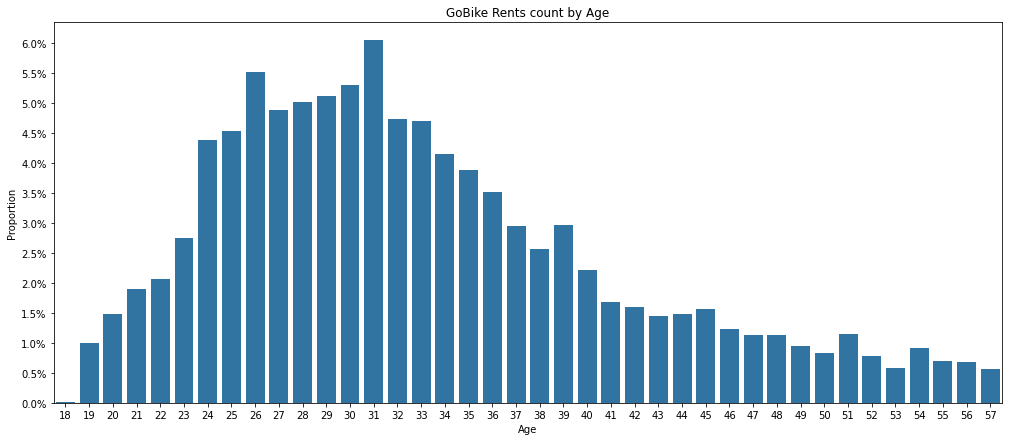

In [21]:
n_type = df['age'].value_counts().sum()
max_type_count = df['age'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, max_prop, 0.005)
tick_names = ['{:0.1f}%'.format(v*100) for v in tick_props]

plt.figure(figsize=[17,7]);
sb.countplot(data=df,x='age',color=sb.color_palette()[0]);
plt.yticks(tick_props * n_type, tick_names)
labels('Age','Proportion','GoBike Rents count by Age')

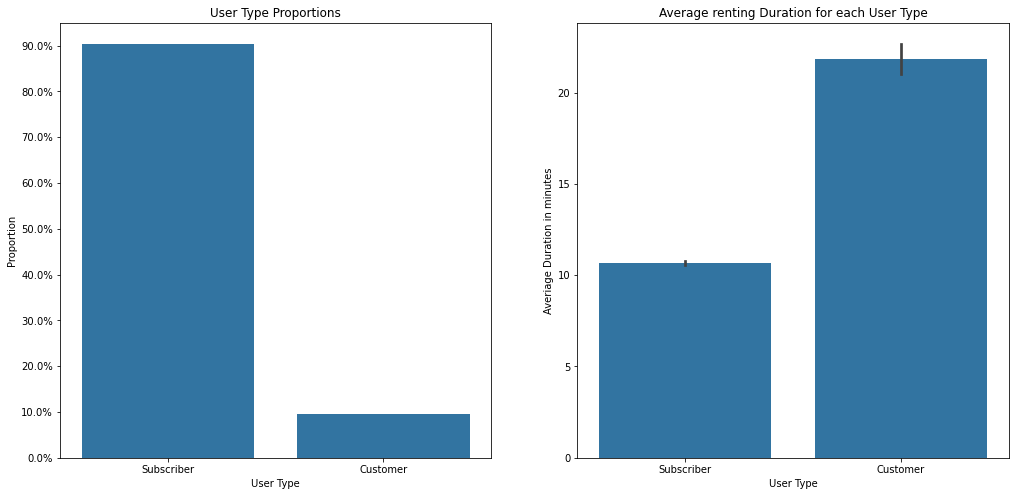

In [22]:
plt.figure(figsize=[17,8]);
plt.subplot(1,2,2)
sb.barplot(data=df,x='user_type',y='duration_min',color=sb.color_palette()[0],order=['Subscriber','Customer']);
labels('User Type','Averiage Duration in minutes','Average renting Duration for each User Type')
# Getting the proportions to graph
n_type = df['user_type'].value_counts().sum()
max_type_count = df['user_type'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, max_prop, 0.10)
tick_names = ['{:0.1f}%'.format(v*100) for v in tick_props]
# plot
plt.subplot(1,2,1)
#plt.figure(figsize=[10,7]);
sb.countplot(data=df,x='user_type',color=sb.color_palette()[0], order=['Subscriber','Customer']);
plt.yticks(tick_props * n_type, tick_names)
labels('User Type','Proportion','User Type Proportions')

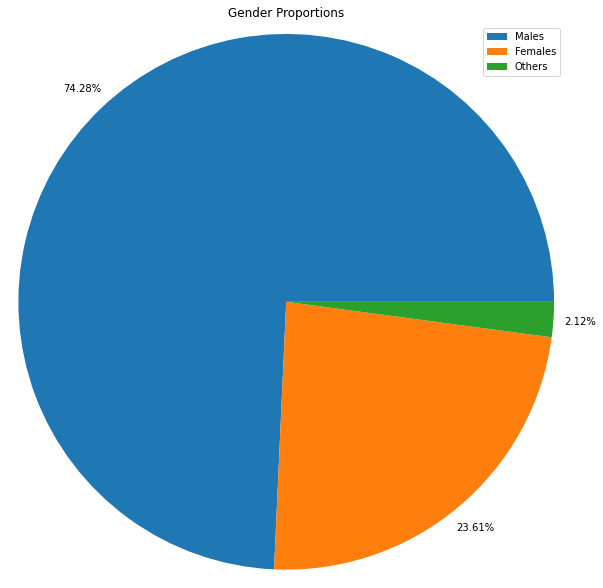

In [23]:
plt.figure(figsize=[10,13]);
x=df['member_gender'].value_counts()
#plt.figure(figsize=[5,7]);
plt.pie(x,labels=None,autopct='%0.2f%%', pctdistance=1.1, labeldistance=1.2,radius=1.2);
plt.legend(['Males','Females','Others']);
plt.title('Gender Proportions');

## (Visualization 2)

### Most Subscribers rent bikes for work, during working days, at 8am & 5pm.
### While most Customers rent bikes through out the week and for much longer duration, specially during weekends, Which makes it safe to assume that Customers rent for entertainment purposes.

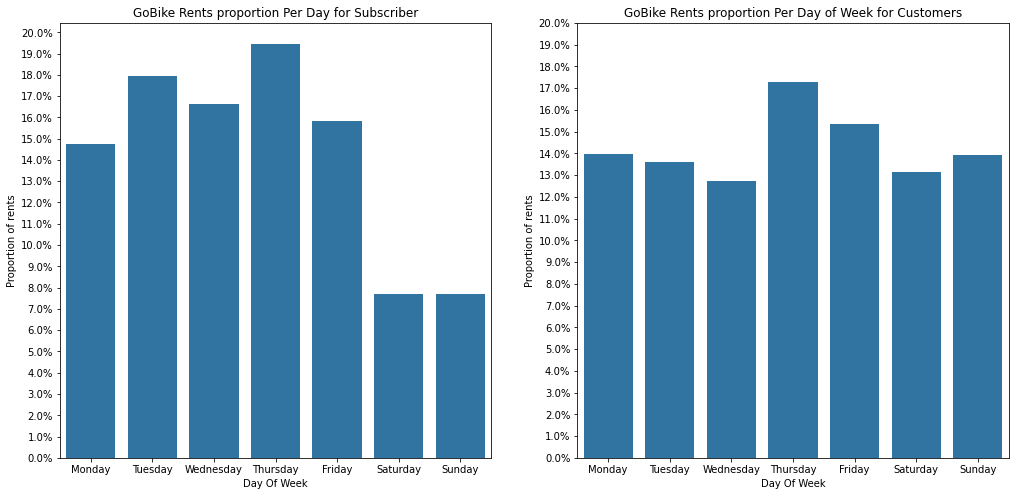

In [24]:
plt.figure(figsize=[17,8]);
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Getting the proportions to graph 1
n_type = df.query('user_type == "Subscriber"')['DOW'].value_counts().sum()
tick_props = np.arange(0, 0.21, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]
# plot 1
plt.subplot(1,2,1)
sb.countplot(data=df.query('user_type == "Subscriber"'),x='DOW',color=sb.color_palette()[0],order=days);
plt.yticks(tick_props * n_type, tick_names);
labels('Day Of Week','Proportion of rents','GoBike Rents proportion Per Day for Subscriber')

# Getting the proportions to graph 2
n_type = df.query('user_type == "Customer"')['DOW'].value_counts().sum()
tick_props = np.arange(0, 0.21, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]
# plot 2
plt.subplot(1,2,2)
sb.countplot(data=df.query('user_type == "Customer"'),x='DOW',color=sb.color_palette()[0],order=days);
plt.yticks(tick_props * n_type, tick_names);
labels('Day Of Week','Proportion of rents','GoBike Rents proportion Per Day of Week for Customers')

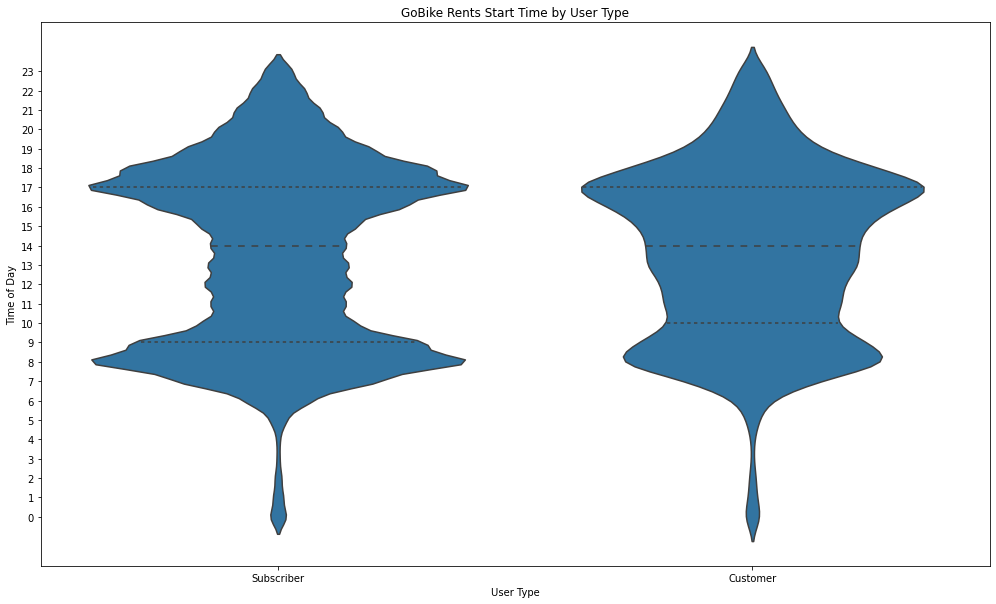

In [25]:
plt.figure(figsize=[17,10]);
sb.violinplot(data=df,x='user_type',y='TOD',inner='quartile',color=sb.color_palette()[0],order=['Subscriber','Customer']);
y=np.arange(0,24,1)
plt.yticks(y,y)
labels('User Type','Time of Day','GoBike Rents Start Time by User Type')

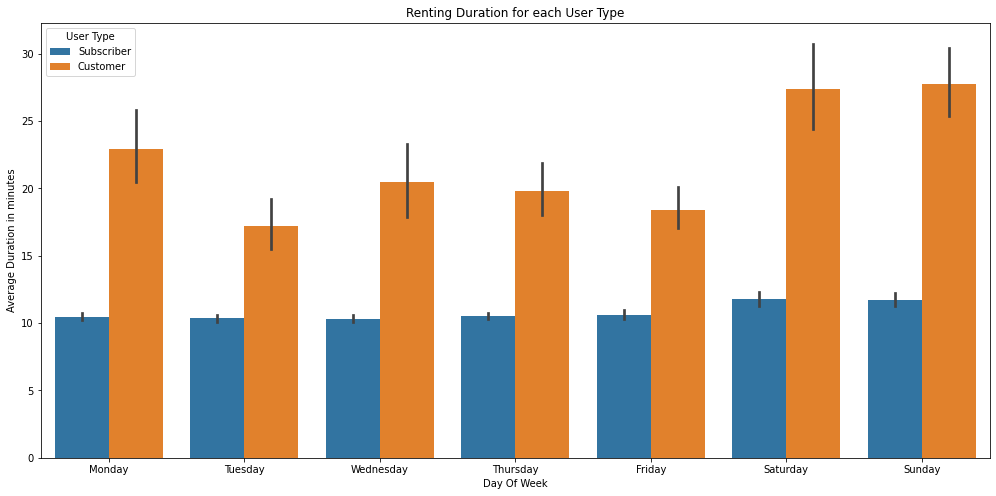

In [26]:
plt.figure(figsize=[17,8]);
sb.barplot(data=df,x='DOW',hue='user_type',y='duration_min',order=days,hue_order=['Subscriber','Customer']);
plt.legend(title="User Type");
labels('Day Of Week','Average Duration in minutes','Renting Duration for each User Type')

#### Note: While most subscribers don't rent during weekends, those who do tend to rent for a little longer duration as shown in the previous graph

## (Visualization 3)

### Genders doesn't have any effect on renting timing but it does have an effect on the renting duration

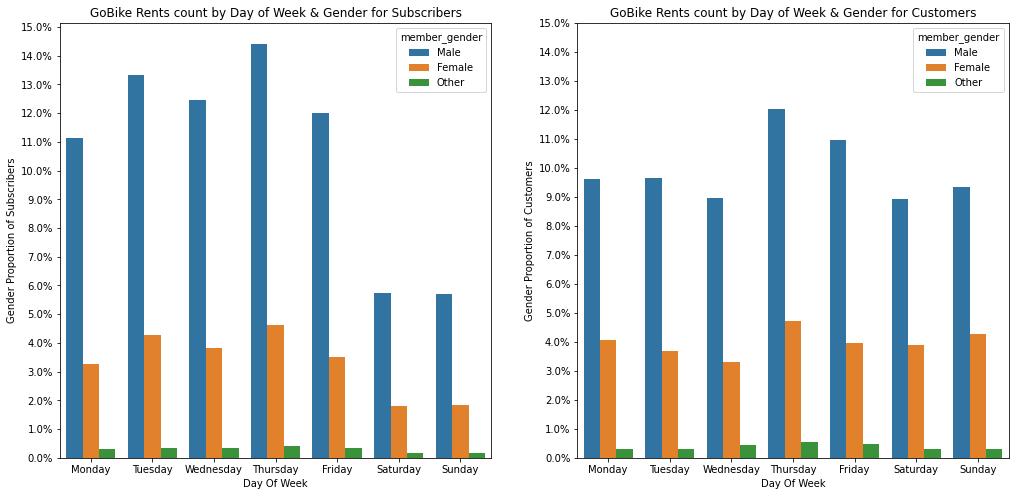

In [27]:
plt.figure(figsize=[17,8]);

# Getting the proportions to graph 1
n_type = df.query('user_type == "Subscriber"')['DOW'].value_counts().sum()
max_type_count = df.query('user_type == "Subscriber" and member_gender== "Male"')['DOW'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, 0.16, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]
# plot 1
plt.subplot(1,2,1)
sb.countplot(data=df.query('user_type == "Subscriber"'),x='DOW',order=days,hue='member_gender',hue_order=['Male','Female','Other']);
plt.yticks(tick_props * n_type, tick_names);
labels('Day Of Week','Gender Proportion of Subscribers','GoBike Rents count by Day of Week & Gender for Subscribers')

# Getting the proportions to graph 2
n_type = df.query('user_type == "Customer"')['DOW'].value_counts().sum()
max_type_count = df.query('user_type == "Customer" and member_gender== "Male"')['DOW'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, 0.16, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]

plt.subplot(1,2,2)
sb.countplot(data=df.query('user_type == "Customer"'),x='DOW',order=days,hue='member_gender');
plt.yticks(tick_props * n_type, tick_names);
labels('Day Of Week','Gender Proportion of Customers','GoBike Rents count by Day of Week & Gender for Customers')


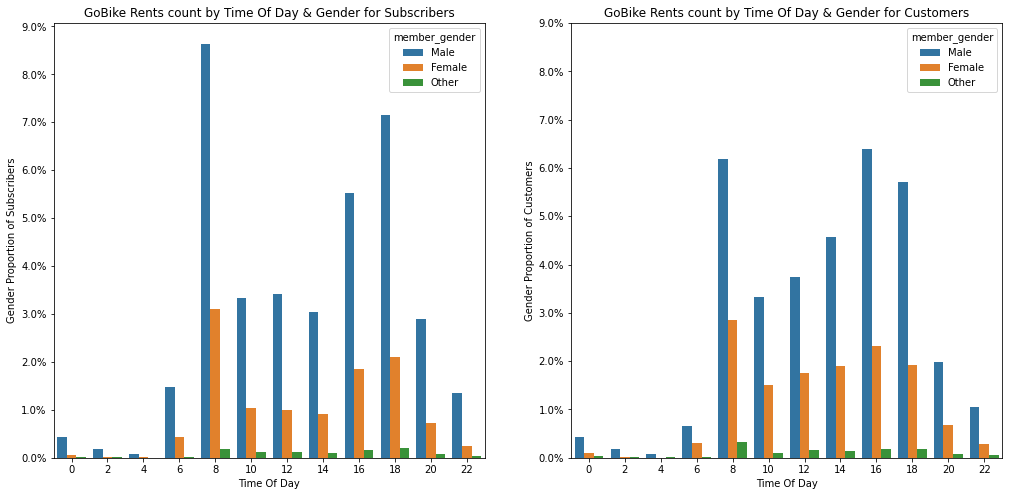

In [28]:
# Getting the proportions to graph 1
n_type = df.query('user_type == "Subscriber"')['TOD'].value_counts().sum()
max_type_count = df.query('user_type == "Subscriber" and member_gender== "Male"')['TOD'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, 0.1, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]

plt.figure(figsize=[17,8]);
hours=np.arange(0,24,2)
plt.subplot(1,2,1)
sb.countplot(data=df.query('user_type == "Subscriber"'),x='TOD',order=hours,hue='member_gender',hue_order=['Male','Female','Other']);
labels('Time Of Day','Gender Proportion of Subscribers','GoBike Rents count by Time Of Day & Gender for Subscribers')
plt.yticks(tick_props * n_type, tick_names);

# Getting the proportions to graph 2
n_type = df.query('user_type == "Customer"')['TOD'].value_counts().sum()
max_type_count = df.query('user_type == "Customer" and member_gender== "Male"')['TOD'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, 0.1, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]

plt.subplot(1,2,2)
sb.countplot(data=df.query('user_type == "Customer"'),x='TOD',order=hours,hue='member_gender');
labels('Time Of Day','Gender Proportion of Customers','GoBike Rents count by Time Of Day & Gender for Customers')
plt.yticks(tick_props * n_type, tick_names);

### Everything seems normal so far, now lets see the effect gender have on renting duration
### Over all males tend to rent for shorter duration.

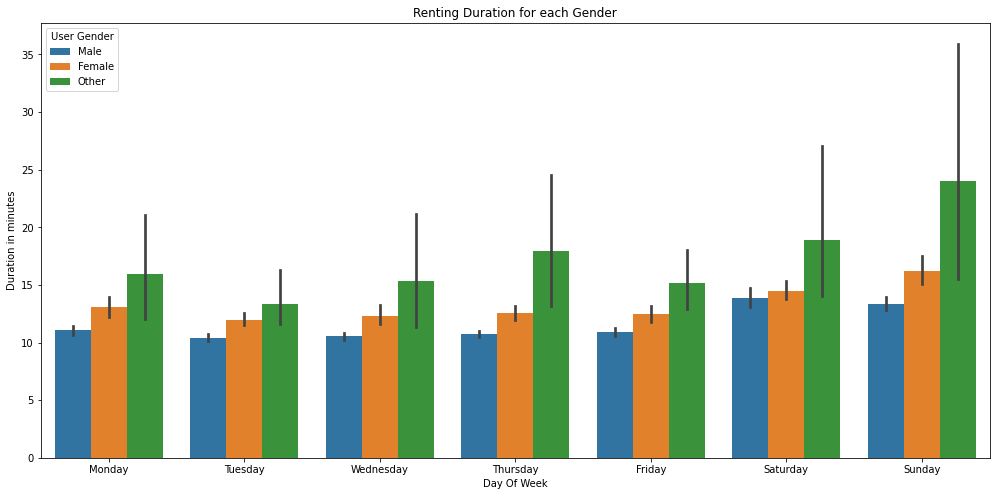

In [29]:
plt.figure(figsize=[17,8]);
# plot
sb.barplot(data=df,x='DOW',hue='member_gender',y='duration_min',order=days,hue_order=['Male','Female','Other']);
labels('Day Of Week','Duration in minutes','Renting Duration for each Gender')
plt.legend(title="User Gender");

### But this is not always true when splitting the data according to User Type, since sometimes male "Customers" rent for longer duration than other genders.

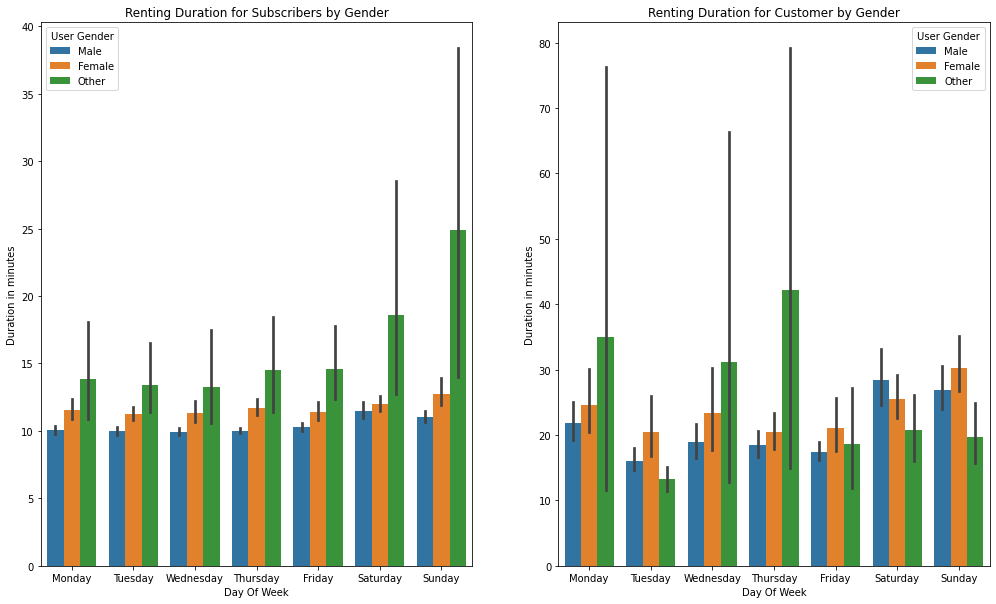

In [30]:
plt.figure(figsize=[17,10]);
# plot
plt.subplot(1,2,1)
sb.barplot(data=df.query('user_type == "Subscriber"'),x='DOW',hue='member_gender',y='duration_min',order=days,hue_order=['Male','Female','Other']);
labels('Day Of Week','Duration in minutes','Renting Duration for Subscribers by Gender')
plt.legend(title="User Gender");
plt.subplot(1,2,2)
sb.barplot(data=df.query('user_type == "Customer"'),x='DOW',hue='member_gender',y='duration_min',order=days,hue_order=['Male','Female','Other']);
labels('Day Of Week','Duration in minutes','Renting Duration for Customer by Gender')
plt.legend(title="User Gender");

## (Visualization 4)
### Age doesn't seem to have big effect on renting duration less than 3 hours, and since most rides average between 10 to 20 minutes, this info is not very useful.

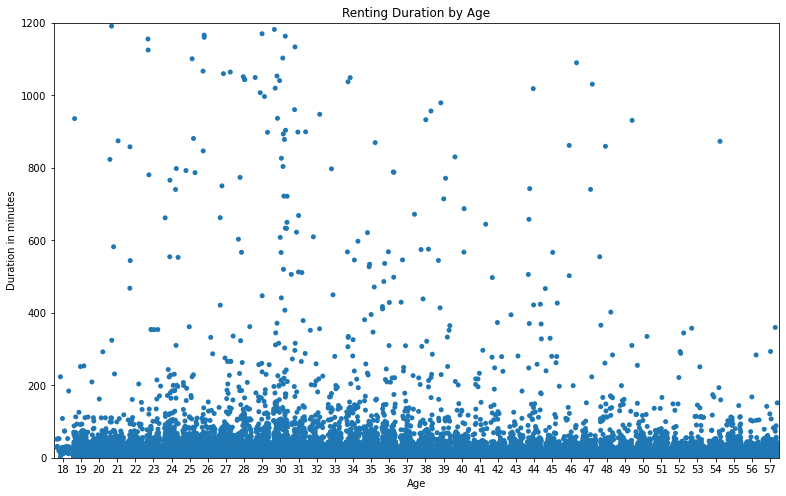

In [31]:
plt.figure(figsize=[13,8]);
sb.stripplot(data=df,x='age',y='duration_min',jitter=0.4,color=sb.color_palette()[0]);
plt.ylim([0,1200]);
labels('Age','Duration in minutes','Renting Duration by Age')

In [33]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-prompt --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1001781 bytes to slide_deck_template.slides.html
